# Classification Predict - Climate Change Belief Analysis Challenge
© Explore Data Science Academy

---
### Honour Code

I {**#Team_ND2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents

#### Section 1: Data Pre-processing

<a href=#one>1.1 Importing Packages</a>

<a href=#two>1.2 Loading Data</a>

<a href=#three>1.3 Exploratory Data Analysis (EDA)</a>

<a href=#four>1.4 Data Engineering</a>

#### Section 2: Model Development and Analysis

<a href=#five>2.1 Modeling</a>

<a href=#six>2.2 Model Performance</a>

#### Section 3: Model Explanation and Conclusions

<a href=#seven>3.1 Model Explanations</a>

<a href=#seven>3.2 Conclusions</a>

# Introduction
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. This Notebook has been so adapted and developed by **TeamND2** - a group of six students from the July 2022 cohort of the Explore Ai Academy **Data Science** course. We are:

 > David Mugambi <br>
 > Gavriel Leibovitz <br>
 > Josiah Aramide <br>
 > Aniedi Oboho-Etuk <br>
 > Joy Obukohwo <br>
 > Marvellous Eromosele <br>
 

### Problem Statement

The scenario involves

### Objectives

TeamND2 seeks to achieve the following objectives for the project brief:

- 1. analyse the supplied data;
- 2. identify xxx;
- 3. de

# Section 1: Data Pre-processing

This section describes steps for importing packages, loading the two datasets - train and test datasets, conducting the exploratory data analysis (EDA) and implementing data engineering.

 <a id="one"></a>
## 1.1 Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Below are the libraries imported for use in this project. The libraries include  |

---

In [34]:
# Libraries for data loading, data manipulation and data visulisation 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import mutual_info_regression #determine mutual info
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import time
import datetime as dt
from sklearn.metrics import r2_score

# Keras for neural networks
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# nltk for preprocessing of text data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer



In [35]:
# Comet
!pip install comet_ml 
import comet_ml
from comet_ml import Experiment 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [166]:
# import nltk for dropping stop words

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Green Energy!!! Is it just a buzz? Is there a thing as Green-House Gas or Global Warming? Today we find out what Twitter users think!

<a id="two"></a>
## 1.2 Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we load the data from the . |

---

In [5]:
from google.colab import files
uploaded = files.upload()



Saving test_with_no_labels.csv to test_with_no_labels.csv
Saving train.csv to train.csv


In [122]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test_with_no_labels.csv']))
# Dataset is now stored in a Pandas Dataframe

In [123]:
# View top of dataset

df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [124]:
# view bottom of dataset

df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [125]:
# View rows
df_train.index # we have 15,819 rows of data

RangeIndex(start=0, stop=15819, step=1)

In [126]:
# view columns

df_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

<a id="three"></a>
## 1.3 Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the features |

---

In [127]:
# Dataset Matrix
df_train.shape

(15819, 3)

In [128]:

# Data Statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [129]:
# Data Types and Non-null count 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


### No Null Rows in Columns

In [130]:
# Check for null values 
def null_cols(df):
    features_with_nulls = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            features_with_nulls.append((col, df[col].isnull().sum()))
            
        
    return features_with_nulls

# Call the function
null_cols(df_train)

[]

### Function method of extracting usernames using list comprehension lambda function

In [131]:
# # Extract Username. 
#Function method of extracting usernames using list comprehension lambda function
def extract_username(df):
    import re
    copy_df = df.copy()
    #copy_df['message'] = copy_df['message'].values.astype(str)
    copy_df['Username'] = list(map(lambda x: re.findall('(@[a-zA-Z]+\w+)', x), copy_df['message']))
    return copy_df

In [132]:
extract_username(df_train)

,sentiment,message,tweetid,Username
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,[@mashable]
1,1,It's not like we lack evidence of anthropogeni...,126103,[]
2,2,RT @RawStory: Researchers say we have three ye...,698562,[@RawStory]
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[@SoyNovioDeTodas]
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,[@ezlusztig]
15815,2,RT @washingtonpost: How climate change could b...,17856,[@washingtonpost]
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,[]
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,[@sara8smiles]


In [133]:
# Extract Username. 
# Using regex methods
import re

#df_train['message'] = df_train['message'].values.astype(str)
df_train['Username'] = df_train['message'].str.extract('(\@[a-zA-Z]+\w+)')
df_train

,sentiment,message,tweetid,Username
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,@mashable
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN
2,2,RT @RawStory: Researchers say we have three ye...,698562,@RawStory
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,NaN
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,@SoyNovioDeTodas
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,@ezlusztig
15815,2,RT @washingtonpost: How climate change could b...,17856,@washingtonpost
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,NaN
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,@sara8smiles


In [134]:


df_train['Username'] = list(map(lambda x: re.findall('(@[a-zA-Z]+\w+)', x), df_train['message'].astype(str)))

df_train

,sentiment,message,tweetid,Username
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,[@mashable]
1,1,It's not like we lack evidence of anthropogeni...,126103,[]
2,2,RT @RawStory: Researchers say we have three ye...,698562,[@RawStory]
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[@SoyNovioDeTodas]
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,[@ezlusztig]
15815,2,RT @washingtonpost: How climate change could b...,17856,[@washingtonpost]
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,[]
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,[@sara8smiles]


### extracting more features from the 'message' column

In [135]:
df_train['message'] = df_train['message'].str.lower()
df_train['message'][5]

"worth a read whether you do or don't believe in climate change https://t.co/gglzvnyjun https://t.co/7afe2mah8j"

In [136]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df_train['message']=df_train['message'].apply(regexp.tokenize)
df_train.head(10)


,sentiment,message,tweetid,Username
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca...",625221,[@mashable]
1,1,"[it, s, not, like, we, lack, evidence, of, ant...",126103,[]
2,2,"[rt, rawstory, researchers, say, we, have, thr...",698562,[@RawStory]
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,[]
4,1,"[rt, soynoviodetodas, it, s, 2016, and, a, rac...",466954,[@SoyNovioDeTodas]
5,1,"[worth, a, read, whether, you, do, or, don, t,...",425577,[]
6,1,"[rt, thenation, mike, pence, doesn, t, believe...",294933,[@thenation]
7,1,"[rt, makeandmendlife, six, big, things, we, ca...",992717,[@makeandmendlife]
8,1,"[aceofspadeshq, my, 8yo, nephew, is, inconsola...",664510,[@AceofSpadesHQ]
9,1,"[rt, paigetweedy, no, offense, but, like, how,...",260471,[@paigetweedy]


In [138]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['hell', 'heaven', 'god', 'christ', 'http', 'https']
stopwords.extend(my_stopwords)

In [139]:
# Remove stopwords
df_train['message_tokens'] = df_train['message'].apply(lambda x: [item for item in x if item not in stopwords])
df_train.head(10)

,sentiment,message,tweetid,Username,message_tokens
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca...",625221,[@mashable],"[polyscimajor, epa, chief, think, carbon, diox..."
1,1,"[it, s, not, like, we, lack, evidence, of, ant...",126103,[],"[like, lack, evidence, anthropogenic, global, ..."
2,2,"[rt, rawstory, researchers, say, we, have, thr...",698562,[@RawStory],"[rt, rawstory, researchers, say, three, years,..."
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,[],"[todayinmaker, wired, 2016, pivotal, year, war..."
4,1,"[rt, soynoviodetodas, it, s, 2016, and, a, rac...",466954,[@SoyNovioDeTodas],"[rt, soynoviodetodas, 2016, racist, sexist, cl..."
5,1,"[worth, a, read, whether, you, do, or, don, t,...",425577,[],"[worth, read, whether, believe, climate, chang..."
6,1,"[rt, thenation, mike, pence, doesn, t, believe...",294933,[@thenation],"[rt, thenation, mike, pence, believe, global, ..."
7,1,"[rt, makeandmendlife, six, big, things, we, ca...",992717,[@makeandmendlife],"[rt, makeandmendlife, six, big, things, today,..."
8,1,"[aceofspadeshq, my, 8yo, nephew, is, inconsola...",664510,[@AceofSpadesHQ],"[aceofspadeshq, 8yo, nephew, inconsolable, wan..."
9,1,"[rt, paigetweedy, no, offense, but, like, how,...",260471,[@paigetweedy],"[rt, paigetweedy, offense, like, believe, glob..."


In [140]:
# create column for words longer than 2 letters

df_train['message_string'] = df_train['message_tokens'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

df_train[['sentiment', 'message', 'message_tokens', 'message_string']].head()

,sentiment,message,message_tokens,message_string
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...
1,1,"[it, s, not, like, we, lack, evidence, of, ant...","[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming
2,2,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...",rawstory researchers say three years act clima...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, pivotal, year, war...",todayinmaker wired 2016 pivotal year war clima...
4,1,"[rt, soynoviodetodas, it, s, 2016, and, a, rac...","[rt, soynoviodetodas, 2016, racist, sexist, cl...",soynoviodetodas 2016 racist sexist climate cha...


In [141]:
# we can have a list of words we are analyzing with as tweet_key_words

tweet_key_words = ' '.join([word for word in df_train['message_string']])
tweet_key_words

'polyscimajor epa chief think carbon dioxide main cause global warming wait yelvcefxkc via mashable like lack evidence anthropogenic global warming rawstory researchers say three years act climate change late wdt0kdur2f z0anpt todayinmaker wired 2016 pivotal year war climate change 44wotxtlcd soynoviodetodas 2016 racist sexist climate change denying bigot leading polls electionnight worth read whether believe climate change gglzvnyjun 7afe2mah8j thenation mike pence believe global warming smoking causes lung cancer gvwyaauu8r makeandmendlife six big things today fight climate change climate activistã tymlu6dbnm aceofspadeshq 8yo nephew inconsolable wants die old age like perish fiery hellscape climate change paigetweedy offense like believe global warming stephenschlegel thinking going die husband believe climate change sjofonã hope people vocal climate change also powering homes renewable energy like goodenergy tveitdal percent chance avoiding dangerous global warming study finds xubt

In [142]:
# we then tokenize the words for future use

tokenized_key_words = nltk.tokenize.word_tokenize(tweet_key_words)
tokenized_key_words[:5] # first 5 tokenized words 

['polyscimajor', 'epa', 'chief', 'think', 'carbon']

In [143]:
# let's have a frequency table of our tokenzed words

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_key_words)
fdist

FreqDist({'climate': 13019, 'change': 12645, 'global': 3796, 'warming': 3534, 'trump': 2386, 'believe': 1158, 'amp': 940, 'world': 732, 'real': 720, 'going': 670, ...})

In [144]:
# create column for words that occur more than twice

df_train['message_string_fdist'] = df_train['message_tokens'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 2 ]))

df_train[['sentiment', 'message', 'message_tokens', 'message_string', 'message_string_fdist']].head()

,sentiment,message,message_tokens,message_string,message_string_fdist
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...,epa chief think carbon dioxide main cause glob...
1,1,"[it, s, not, like, we, lack, evidence, of, ant...","[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming
2,2,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...",rawstory researchers say three years act clima...,rawstory researchers say three years act clima...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, pivotal, year, war...",todayinmaker wired 2016 pivotal year war clima...,wired 2016 pivotal year war climate change
4,1,"[rt, soynoviodetodas, it, s, 2016, and, a, rac...","[rt, soynoviodetodas, 2016, racist, sexist, cl...",soynoviodetodas 2016 racist sexist climate cha...,2016 racist sexist climate change denying bigo...


In [145]:
# Lemmatization is the idea of keeping the primary form of a word and discarding it's derivatives
# male is the lemma of man, gentleman, masculine etc. every other word in the register that tends to describe same will return it's lemma form
# same idea is used for sentences

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [146]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df_train['message_string_lem'] = df_train['message_string_fdist'].apply(wordnet_lem.lemmatize)

In [147]:
# words returning it's lemma form

# check if the columns are equal
df_train['is_equal']= (df_train['message_string_fdist']==df_train['message_string_lem'])
df_train[['is_equal', 'message_string_fdist', 'message_string_lem']].head()

,is_equal,message_string_fdist,message_string_lem
0,True,epa chief think carbon dioxide main cause glob...,epa chief think carbon dioxide main cause glob...
1,True,like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming
2,True,rawstory researchers say three years act clima...,rawstory researchers say three years act clima...
3,True,wired 2016 pivotal year war climate change,wired 2016 pivotal year war climate change
4,True,2016 racist sexist climate change denying bigo...,2016 racist sexist climate change denying bigo...


In [148]:
# let's have a Tweet Word Cloud to enjoy our analysis

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
tweet_words_lem = ' '.join([word for word in df_train['message_string_lem']])
tweet_words_lem

'epa chief think carbon dioxide main cause global warming wait via mashable like lack evidence anthropogenic global warming rawstory researchers say three years act climate change late wired 2016 pivotal year war climate change 2016 racist sexist climate change denying bigot leading polls electionnight worth read whether believe climate change thenation mike pence believe global warming smoking causes cancer six big things today fight climate change climate aceofspadeshq wants die old age like climate change offense like believe global warming stephenschlegel thinking going die husband believe climate change sjofonã hope people climate change also homes renewable energy like goodenergy tveitdal percent chance avoiding dangerous global warming study finds trump government removes climate change page epa website hours ahead climatemarch fossil fuel giant exxonmobil misled public climate change harvard academics conclude glblctzn live forever nothing climate change issues scrubbed today c

(-0.5, 599.5, 399.5, -0.5)

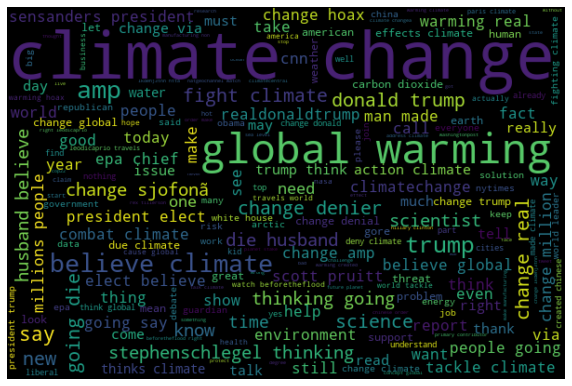

In [150]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(tweet_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

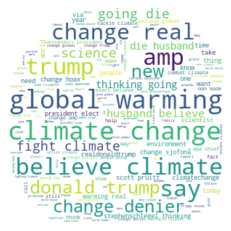

In [151]:
x, y = np.ogrid[:300, :300]
mask = (x - 160) ** 2 + (y - 160) ** 2 > 170 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(tweet_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

In [152]:
# frequency distribution of tweet_words_lem


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [153]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(tweet_words_lem)
fd = FreqDist(words)

In [154]:
# 10 most common words in tweets

fd.most_common(10)


[('climate', 13019),
 ('change', 12645),
 ('global', 3796),
 ('warming', 3534),
 ('trump', 2386),
 ('believe', 1158),
 ('amp', 940),
 ('world', 732),
 ('real', 720),
 ('going', 670)]

In [155]:
fd.tabulate(10)

climate  change  global warming   trump believe     amp   world    real   going 
  13019   12645    3796    3534    2386    1158     940     732     720     670 


### Sentiment Analysis

In [156]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [157]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [158]:
# let's checkout our Negative, Neutral, Positive words and Compound (a combination of the other 3)

df_train['polarity'] = df_train['message_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_train.tail(10)

,sentiment,message,tweetid,Username,message_tokens,message_string,message_string_fdist,message_string_lem,is_equal,polarity
15809,2,"[the, quest, to, capture, and, store, carbon, ...",705048,[],"[quest, capture, store, carbon, slow, climate,...",quest capture store carbon slow climate change...,quest capture store carbon slow climate change...,quest capture store carbon slow climate change...,True,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp..."
15810,0,"[this, global, warming, so, late, in, the, sea...",572819,[],"[global, warming, late, season, pretty, annoying]",global warming late season pretty annoying,global warming late season pretty annoying,global warming late season pretty annoying,True,"{'neg': 0.257, 'neu': 0.286, 'pos': 0.457, 'co..."
15811,1,"[rt, stephenschlegel, she, s, thinking, about,...",426353,[@StephenSchlegel],"[rt, stephenschlegel, thinking, going, die, hu...",stephenschlegel thinking going die husband bel...,stephenschlegel thinking going die husband bel...,stephenschlegel thinking going die husband bel...,True,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp..."
15812,1,"[rt, sierraclub, 2016, hottest, year, in, hist...",989478,[@SierraClub],"[rt, sierraclub, 2016, hottest, year, history,...",sierraclub 2016 hottest year history also 2016...,sierraclub 2016 hottest year history also 2016...,sierraclub 2016 hottest year history also 2016...,True,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp..."
15813,1,"[rt, thinkprogress, epa, head, falsely, claims...",442853,[@thinkprogress],"[rt, thinkprogress, epa, head, falsely, claims...",thinkprogress epa head falsely claims carbon e...,thinkprogress epa head falsely claims carbon e...,thinkprogress epa head falsely claims carbon e...,True,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp..."
15814,1,"[rt, ezlusztig, they, took, down, the, materia...",22001,[@ezlusztig],"[rt, ezlusztig, took, material, global, warmin...",ezlusztig took material global warming lgbt ri...,ezlusztig took material global warming lgbt ri...,ezlusztig took material global warming lgbt ri...,True,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
15815,2,"[rt, washingtonpost, how, climate, change, cou...",17856,[@washingtonpost],"[rt, washingtonpost, climate, change, could, b...",washingtonpost climate change could breaking 2...,washingtonpost climate change could breaking 2...,washingtonpost climate change could breaking 2...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15816,0,"[notiven, rt, nytimesworld, what, does, trump,...",384248,[],"[notiven, rt, nytimesworld, trump, actually, b...",notiven nytimesworld trump actually believe cl...,nytimesworld trump actually believe climate ch...,nytimesworld trump actually believe climate ch...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15817,-1,"[rt, sara8smiles, hey, liberals, the, climate,...",819732,[@sara8smiles],"[rt, sara8smiles, hey, liberals, climate, chan...",sara8smiles hey liberals climate change crap h...,sara8smiles hey liberals climate change crap h...,sara8smiles hey liberals climate change crap h...,True,"{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compou..."
15818,0,"[rt, chet_cannon, kurteichenwald, s, climate, ...",806319,"[@Chet_Cannon, @kurteichenwald]","[rt, chet_cannon, kurteichenwald, climate, cha...",chet_cannon kurteichenwald climate change equa...,kurteichenwald climate change equation,kurteichenwald climate change equation,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


# Transform Data Frame

In [159]:


# Change data structure
df_train2 = pd.concat(
    [df_train.drop(['Username','tweetid', 'polarity'], axis=1), 
     df_train['polarity'].apply(pd.Series)], axis=1)


df_train2.head()

,sentiment,message,message_tokens,message_string,message_string_fdist,message_string_lem,is_equal,neg,neu,pos,compound
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...,epa chief think carbon dioxide main cause glob...,epa chief think carbon dioxide main cause glob...,True,0.000,0.873,0.127,0.1531
1,1,"[it, s, not, like, we, lack, evidence, of, ant...","[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,True,0.245,0.319,0.436,0.2023
2,2,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...",rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,True,0.000,1.000,0.000,0.0000
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, pivotal, year, war...",todayinmaker wired 2016 pivotal year war clima...,wired 2016 pivotal year war climate change,wired 2016 pivotal year war climate change,True,0.394,0.606,0.000,-0.5994
4,1,"[rt, soynoviodetodas, it, s, 2016, and, a, rac...","[rt, soynoviodetodas, 2016, racist, sexist, cl...",soynoviodetodas 2016 racist sexist climate cha...,2016 racist sexist climate change denying bigo...,2016 racist sexist climate change denying bigo...,True,0.444,0.556,0.000,-0.7506


In [160]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df_train2['sentiment'] = df_train2['compound'].apply(lambda x: 'positive' if (x >0 and x<2) else 'news' if x==2 else 'neutral' if x==0 else 'negative')
df_train2[['compound', 'sentiment']]

,compound,sentiment
0,0.1531,positive
1,0.2023,positive
2,0.0000,neutral
3,-0.5994,negative
4,-0.7506,negative
...,...,...
15814,0.5859,positive
15815,0.0000,neutral
15816,0.0000,neutral
15817,-0.5719,negative


In [161]:
# Tweet with highest positive sentiment
df_train2.loc[df_train2['compound'].idxmax()].values

array(['positive',
       list(['rt', 'martin_durkin', 'wonderful', 'trump', 'appoints', 'the', 'charming', 'clever', 'sane', 'myron', 'ebell', 'to', 'take', 'on', 'the', 'global', 'warming', 'charlatans', 'hurrah', 'httpã', 'â', 'â']),
       list(['rt', 'martin_durkin', 'wonderful', 'trump', 'appoints', 'charming', 'clever', 'sane', 'myron', 'ebell', 'take', 'global', 'warming', 'charlatans', 'hurrah', 'httpã', 'â', 'â']),
       'martin_durkin wonderful trump appoints charming clever sane myron ebell take global warming charlatans hurrah httpã',
       'martin_durkin wonderful trump appoints charming clever sane myron ebell take global warming charlatans hurrah httpã',
       'martin_durkin wonderful trump appoints charming clever sane myron ebell take global warming charlatans hurrah httpã',
       True, 0.0, 0.389, 0.611, 0.9403], dtype=object)

In [162]:
# Tweet with highest negative sentiment 
df_train2.loc[df_train2['compound'].idxmin()].values

array(['negative',
       list(['rt', 'nasmaraj', 'ok', 'here', 's', 'my', 'problem', 'with', 'yall', 'there', 's', 'global', 'warming', 'terrorism', 'rape', 'murder', 'amp', 'war', 'going', 'on', 'but', 'a', 'song', 'is', 'what']),
       list(['rt', 'nasmaraj', 'ok', 'problem', 'yall', 'global', 'warming', 'terrorism', 'rape', 'murder', 'amp', 'war', 'going', 'song']),
       'nasmaraj problem yall global warming terrorism rape murder amp war going song',
       'nasmaraj problem yall global warming terrorism rape murder amp war going song',
       'nasmaraj problem yall global warming terrorism rape murder amp war going song',
       True, 0.73, 0.213, 0.057, -0.9682], dtype=object)

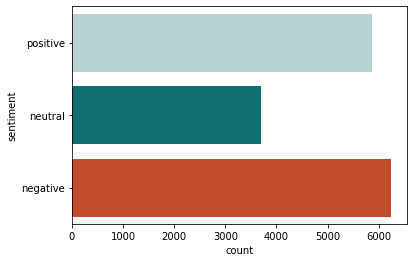

In [163]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df_train2, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             )

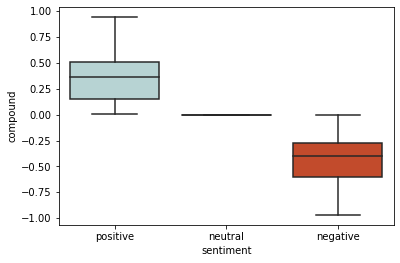

In [164]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df_train2)

In [165]:
df_train2[:].head()

,sentiment,message,message_tokens,message_string,message_string_fdist,message_string_lem,is_equal,neg,neu,pos,compound
0,positive,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...,epa chief think carbon dioxide main cause glob...,epa chief think carbon dioxide main cause glob...,True,0.000,0.873,0.127,0.1531
1,positive,"[it, s, not, like, we, lack, evidence, of, ant...","[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming,True,0.245,0.319,0.436,0.2023
2,neutral,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...",rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,rawstory researchers say three years act clima...,True,0.000,1.000,0.000,0.0000
3,negative,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, pivotal, year, war...",todayinmaker wired 2016 pivotal year war clima...,wired 2016 pivotal year war climate change,wired 2016 pivotal year war climate change,True,0.394,0.606,0.000,-0.5994
4,negative,"[rt, soynoviodetodas, it, s, 2016, and, a, rac...","[rt, soynoviodetodas, 2016, racist, sexist, cl...",soynoviodetodas 2016 racist sexist climate cha...,2016 racist sexist climate change denying bigo...,2016 racist sexist climate change denying bigo...,True,0.444,0.556,0.000,-0.7506


<a id="four"></a>
## 1.4 Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we conduct our feature engineering to: clean the dataset, and create new features - as identified in the EDA phase. Later, we initiate some ... |

---

# Section 2: Model Development and Analysis

This section describes

# <a id="five"></a>
## 2.1 Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, the team developed some ... Our choice of models include:

- M
- L
- Support Vector Machines
- DecisionTrees
- RandomForest
---
We continue to explore some ... 

Also, in this stage...

<a id="six"></a>
## 2.2 Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we will compare the relative performance of the various ... |

---
We will use the following

# Section 3: Model Explanations and Conclusions

This section describes

<a id="seven"></a>
## 3.1 Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the best performing model works in a simple way ...|

---

<a id="seven"></a>
## 3.2 Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the best performing model works in a simple way ...|

---